In [80]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity

In [81]:
image = cv2.imread('sar_1_gray.jpg', cv2.COLOR_BGR2GRAY)

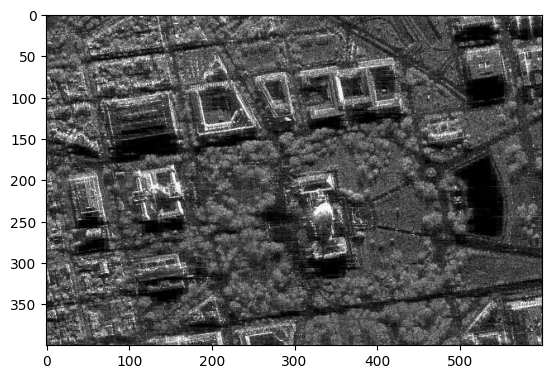

In [82]:
plt.imshow(image, cmap="gray")

# Гистограмма


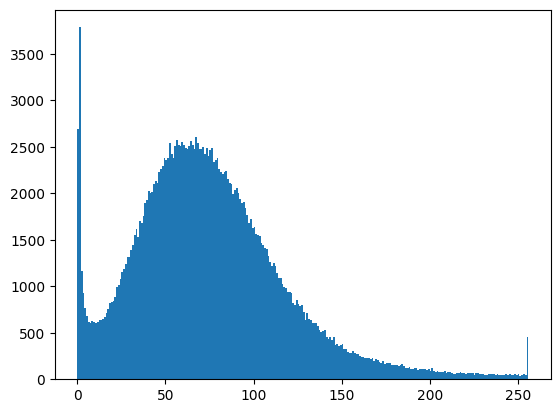

In [83]:
plt.hist(image.ravel(), bins=256, range=[0,256])

plt.show()

# Алгоритм гамма коррекции

In [84]:
def gamma_correction(img, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img, table)

In [85]:
gamma_05 = gamma_correction(image, 0.5)
gamma_20 = gamma_correction(image, 2.0)

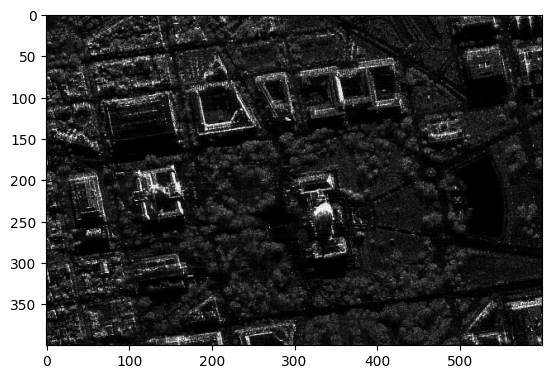

In [43]:
plt.imshow(gamma_05)

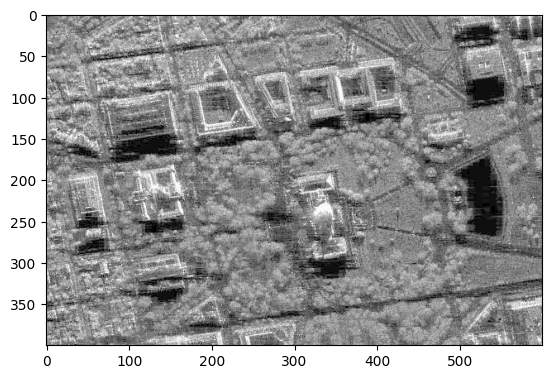

In [44]:
plt.imshow(gamma_20)

# Сравнение изображений

In [86]:
print('MSE: ' + str(np.mean((image - gamma_05) ** 2)))
print('MSE: ' + str(np.mean((image - gamma_20) ** 2)))

MSE: 104.69057083333334
MSE: 102.92194583333334


In [87]:
print('SSIM: ' +str(structural_similarity (image, gamma_05, win_size= 3)))
print('SSIM: ' +str(structural_similarity (image, gamma_20, win_size= 3)))

SSIM: 0.5004821147426521
SSIM: 0.7733705253862683


# Алгоритм статистической цветокоррекции

In [90]:
gray = cv2.equalizeHist(image)

In [98]:
mean_val = np.mean(gray)
std_val = np.std(gray)
corrected = np.zeros_like(img, dtype=np.float32)
for i in range(3):
    channel = image.astype(np.float32)
    corrected = (channel - np.mean(channel)) / np.std(channel) * std_val + mean_val

In [99]:
corrected = np.clip(corrected, 0, 255).astype(np.uint8)

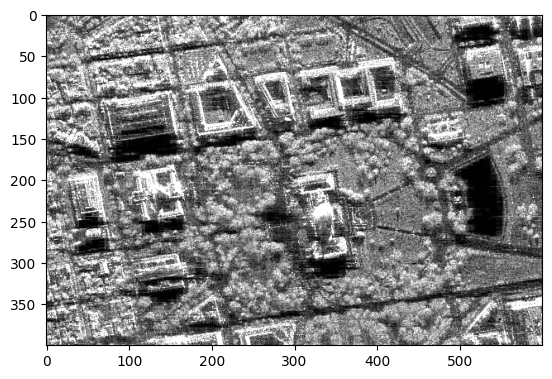

In [101]:
plt.imshow(corrected, cmap="gray")

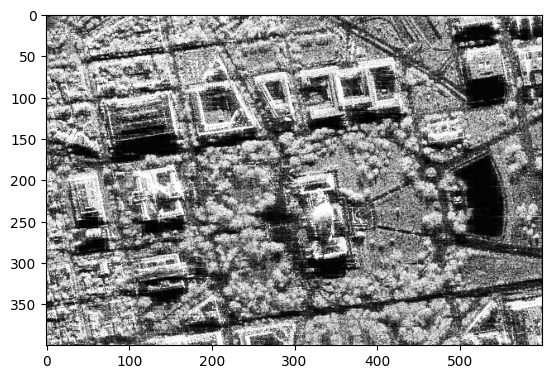

In [102]:
plt.imshow(gray, cmap="gray")

In [62]:
print('MSE: ' + str(np.mean((image - corrected) ** 2)))

MSE: 0.49101666666666666


# Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами

In [155]:
_, th1 = cv2.threshold(image, 80, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(image, 170, 255, cv2.THRESH_BINARY)
_, th3 = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY_INV)
_, th4 = cv2.threshold(img, 170, 170, cv2.THRESH_BINARY_INV)

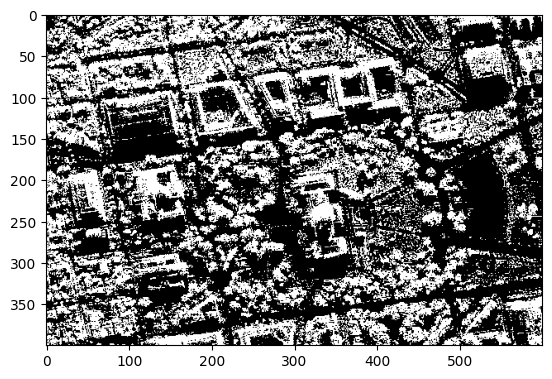

In [151]:
plt.imshow(th1, cmap="gray")

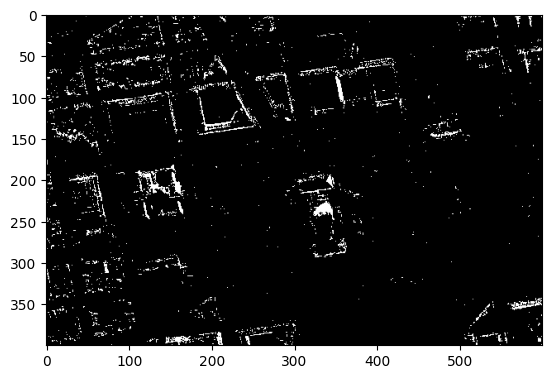

In [152]:
plt.imshow(th2, cmap="gray")

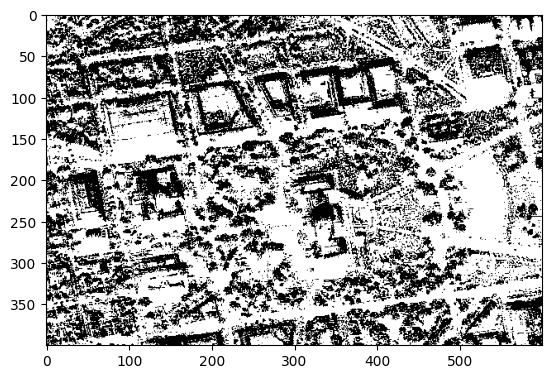

In [156]:
plt.imshow(th3, cmap="gray")

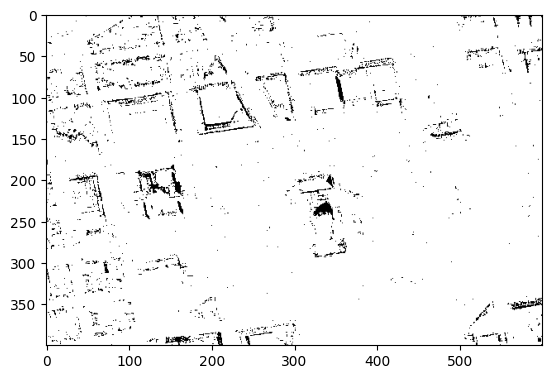

In [157]:
plt.imshow(th4, cmap="gray")